In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

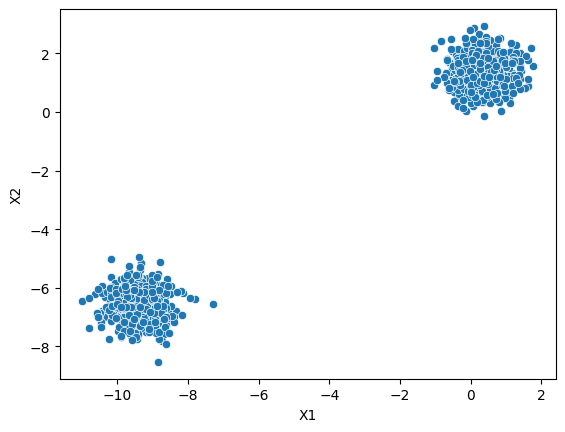

In [3]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

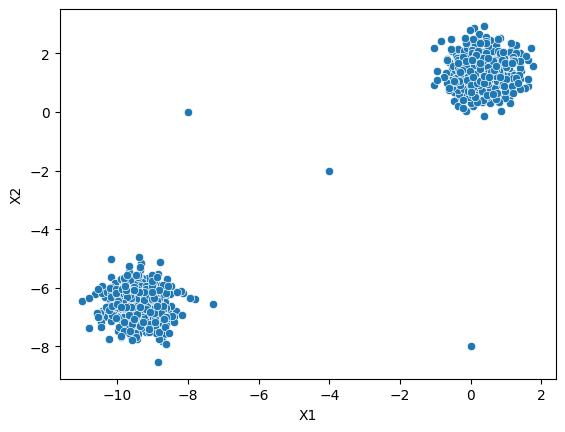

In [4]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [5]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

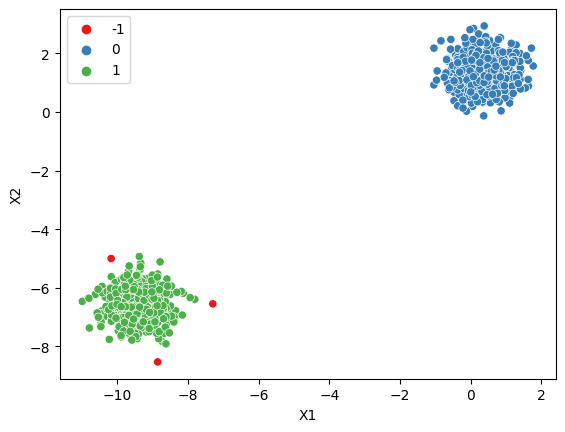

In [9]:
display_categories(dbscan,two_blobs)

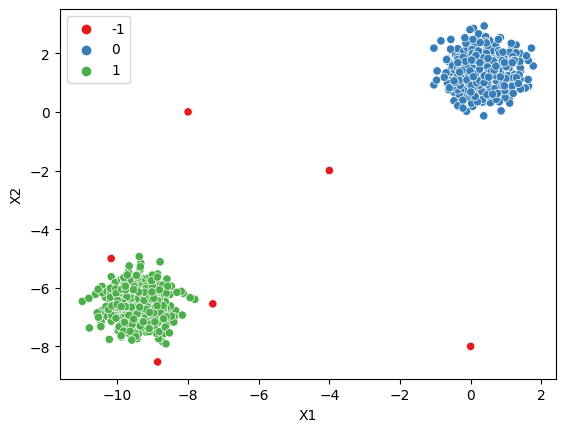

In [10]:
display_categories(dbscan,two_blobs_outliers)

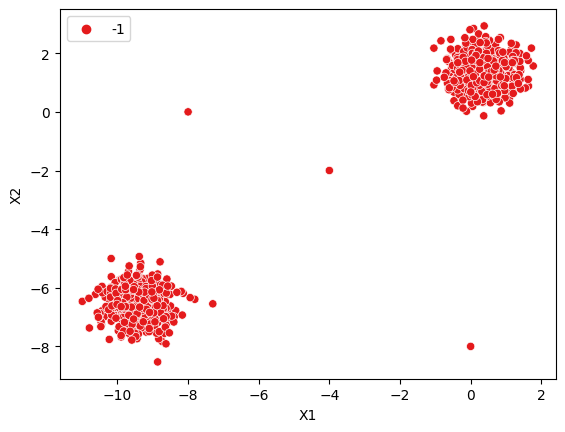

In [11]:
dbscan = DBSCAN(eps=0.001) # Treat all point as outlier
display_categories(dbscan,two_blobs_outliers)

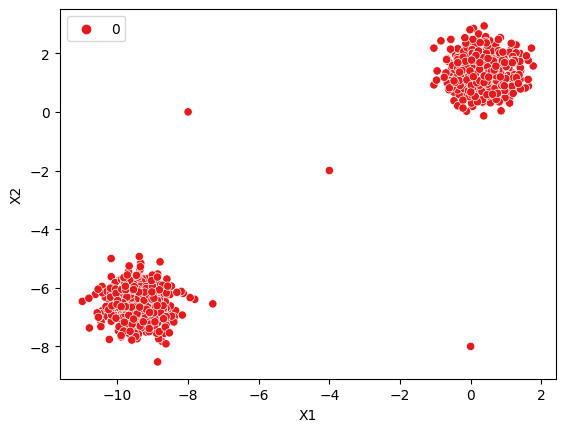

In [12]:
dbscan = DBSCAN(eps=10) # Treat all point as same cluster
display_categories(dbscan,two_blobs_outliers)

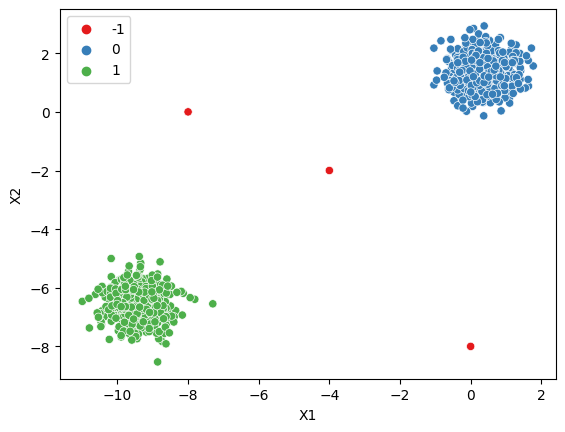

In [13]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [14]:
np.sum(dbscan.labels_==-1) #Number of outliers

3

In [15]:
100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_) #Percentage of outliers

0.29910269192422734

In [28]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7,200):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

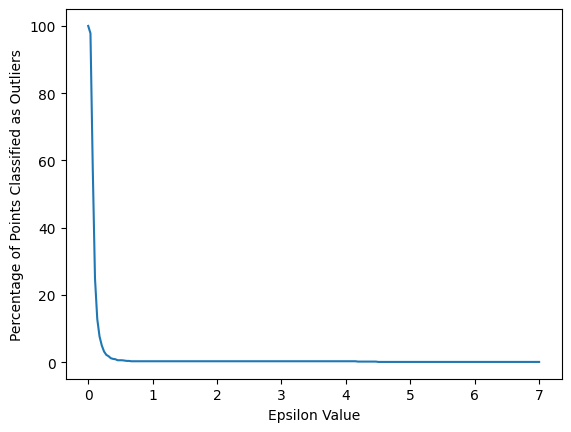

In [29]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

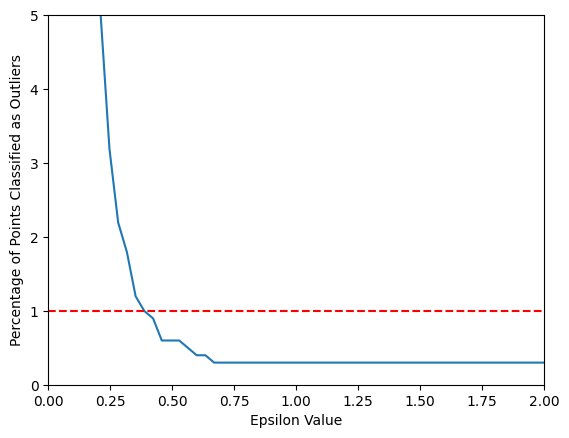

In [31]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

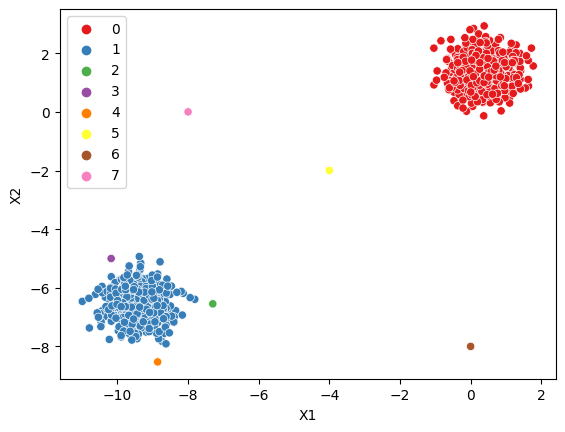

In [32]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

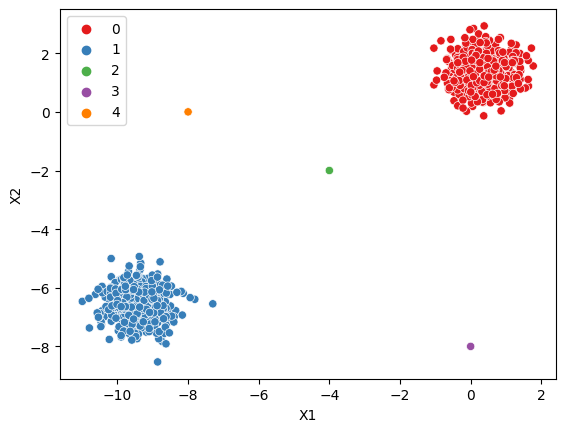

In [33]:
dbscan = DBSCAN(min_samples=1,eps=0.75)
display_categories(dbscan,two_blobs_outliers)